In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
import multigrate as mtg
import scanpy as sc
import numpy as np
import pandas as pd

Global seed set to 0


In [2]:
sc.set_figure_params(dpi_save=300)

In [3]:
rna = sc.read('../../../data/hao-2020/rna_hvg_batch.h5ad')
rna

AnnData object with n_obs × n_vars = 149926 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'names', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [4]:
adt = sc.read('../../../data/hao-2020/protein.h5ad')
adt

AnnData object with n_obs × n_vars = 149926 × 228
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'predicted.celltype.l1', 'predicted.celltype.l2', 'predicted.celltype.l3'
    var: 'n_cells'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [5]:
adata = mtg.data.organize_multiome_anndatas(
    adatas = [[rna], [adt]],
    groups = [[0], [0]],
    layers = [['count'], [None]],
    modality_lengths=[4000, 228],
)
adata

AnnData object with n_obs × n_vars = 149926 × 4228
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'group'
    var: 'names', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    varm: 'PCs'
    layers: 'count'

In [6]:
mtg.model.MultiVAE.setup_anndata(
    adata,
    categorical_covariate_keys=['Batch'],
    rna_indices_end=4000,
)

INFO     No batch_key inputted, assuming all cells are same batch                            
INFO     No label_key inputted, assuming all cells have same label                           
INFO     Using data from adata.X                                                             
INFO     Successfully registered anndata object containing 149926 cells, 4228 vars, 1        
         batches, 1 labels, and 0 proteins. Also registered 1 extra categorical covariates   
         and 1 extra continuous covariates.                                                  
INFO     Please do not further modify adata until model is trained.                          


In [9]:
model = mtg.model.MultiVAE(
    adata, 
    modality_lengths=[4000, 228],
    losses=['nb', 'mse'],
    loss_coefs={'kl': 1e-5,
               'integ': 0,
               },
    z_dim=15,
    cond_dim=10,
    dropout=0.2,
    n_layers_encoders=[2, 2],
    n_layers_decoders=[2, 2],
)

In [10]:
model.train(max_epochs=200, lr=1e-3, batch_size=256)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Set SLURM handle signals.


Epoch 1/200:   0%|          | 1/200 [00:24<1:19:59, 24.12s/it, loss=1.09e+03, v_num=1]

Metric elbo_validation improved. New best score: 1091.195


Epoch 2/200:   1%|          | 2/200 [00:35<55:14, 16.74s/it, loss=1.03e+03, v_num=1]  

Metric elbo_validation improved by 59.953 >= min_delta = 0.0. New best score: 1031.242


Epoch 3/200:   2%|▏         | 3/200 [00:50<51:24, 15.66s/it, loss=1.02e+03, v_num=1]

Metric elbo_validation improved by 14.557 >= min_delta = 0.0. New best score: 1016.685


Epoch 4/200:   2%|▏         | 4/200 [01:04<49:52, 15.27s/it, loss=987, v_num=1]     

Metric elbo_validation improved by 6.687 >= min_delta = 0.0. New best score: 1009.998


Epoch 5/200:   2%|▎         | 5/200 [01:19<48:45, 15.00s/it, loss=997, v_num=1]

Metric elbo_validation improved by 2.972 >= min_delta = 0.0. New best score: 1007.026


Epoch 6/200:   3%|▎         | 6/200 [01:34<48:22, 14.96s/it, loss=977, v_num=1]

Metric elbo_validation improved by 3.768 >= min_delta = 0.0. New best score: 1003.258


Epoch 7/200:   4%|▎         | 7/200 [01:47<46:24, 14.43s/it, loss=971, v_num=1]

Metric elbo_validation improved by 1.095 >= min_delta = 0.0. New best score: 1002.163


Epoch 8/200:   4%|▍         | 8/200 [01:58<42:45, 13.36s/it, loss=983, v_num=1]

Metric elbo_validation improved by 0.494 >= min_delta = 0.0. New best score: 1001.668


Epoch 9/200:   4%|▍         | 9/200 [02:12<43:17, 13.60s/it, loss=961, v_num=1]

Metric elbo_validation improved by 1.349 >= min_delta = 0.0. New best score: 1000.320


Epoch 10/200:   5%|▌         | 10/200 [02:27<44:02, 13.91s/it, loss=958, v_num=1]

Metric elbo_validation improved by 1.953 >= min_delta = 0.0. New best score: 998.367


Epoch 11/200:   6%|▌         | 11/200 [02:40<43:28, 13.80s/it, loss=952, v_num=1]

Metric elbo_validation improved by 2.557 >= min_delta = 0.0. New best score: 995.809


Epoch 12/200:   6%|▌         | 12/200 [02:53<42:21, 13.52s/it, loss=963, v_num=1]

Metric elbo_validation improved by 0.346 >= min_delta = 0.0. New best score: 995.464


Epoch 13/200:   6%|▋         | 13/200 [03:07<42:44, 13.71s/it, loss=947, v_num=1]

Metric elbo_validation improved by 0.950 >= min_delta = 0.0. New best score: 994.514


Epoch 17/200:   8%|▊         | 17/200 [04:06<44:01, 14.44s/it, loss=943, v_num=1]

Metric elbo_validation improved by 0.963 >= min_delta = 0.0. New best score: 993.551


Epoch 18/200:   9%|▉         | 18/200 [04:21<43:54, 14.48s/it, loss=948, v_num=1]

Metric elbo_validation improved by 0.533 >= min_delta = 0.0. New best score: 993.018


Epoch 19/200:  10%|▉         | 19/200 [04:35<43:48, 14.52s/it, loss=957, v_num=1]

Metric elbo_validation improved by 0.790 >= min_delta = 0.0. New best score: 992.228


Epoch 20/200:  10%|█         | 20/200 [04:49<42:36, 14.21s/it, loss=937, v_num=1]

Metric elbo_validation improved by 0.318 >= min_delta = 0.0. New best score: 991.910


Epoch 21/200:  10%|█         | 21/200 [05:01<40:54, 13.71s/it, loss=945, v_num=1]

Metric elbo_validation improved by 0.621 >= min_delta = 0.0. New best score: 991.288


Epoch 22/200:  11%|█         | 22/200 [05:15<40:50, 13.77s/it, loss=935, v_num=1]

Metric elbo_validation improved by 0.453 >= min_delta = 0.0. New best score: 990.835


Epoch 23/200:  12%|█▏        | 23/200 [05:30<41:47, 14.16s/it, loss=945, v_num=1]

Metric elbo_validation improved by 0.055 >= min_delta = 0.0. New best score: 990.780


Epoch 68/200:  34%|███▍      | 68/200 [16:10<31:06, 14.14s/it, loss=929, v_num=1]

Monitored metric elbo_validation did not improve in the last 45 records. Best score: 990.780. Signaling Trainer to stop.


Epoch 68/200:  34%|███▍      | 68/200 [16:11<31:26, 14.29s/it, loss=929, v_num=1]


In [11]:
model.get_latent_representation(batch_size=256)
adata

AnnData object with n_obs × n_vars = 149926 × 4228
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'group', 'size_factors', '_scvi_batch', '_scvi_labels'
    var: 'names', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi'
    obsm: '_scvi_extra_categoricals', '_scvi_extra_continuous', 'latent'
    varm: 'PCs'
    layers: 'count'

In [12]:
sc.pp.neighbors(adata, use_rep='latent')
sc.tl.umap(adata)

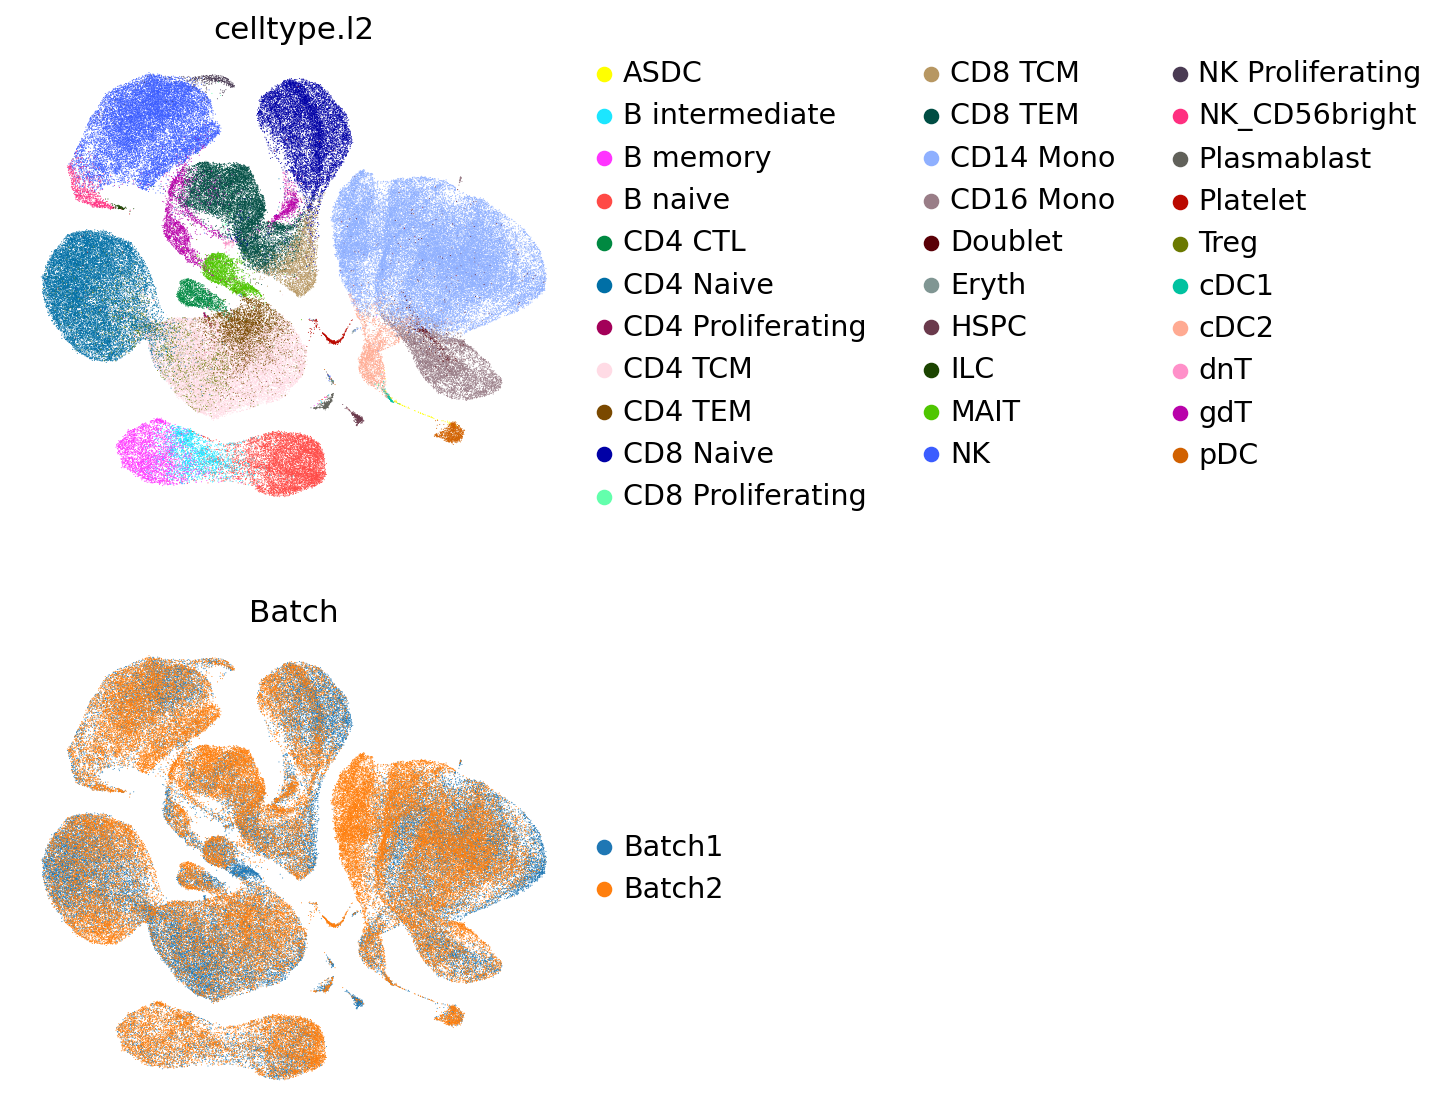

In [13]:
sc.pl.umap(adata, color=['celltype.l2', 'Batch'], ncols=1, frameon=False, save='_multigrate_hao.png')

In [17]:
adata_ = sc.AnnData(adata.X)
adata_.obs = adata.obs.copy()
adata_.uns = adata.uns.copy()
adata_.obsm = adata.obsm.copy()
adata_.obsp = adata.obsp.copy()

In [18]:
adata_.write('multigrate_hao.h5ad')